# Project Bank Personal Loan
#### In this project we will try to predict the potential loan customers from bank perspective

The dataset contains following features-

* ID : Customer ID
* Age : Customer's age in completed years
* Experience : #years of professional experience
* Income : Annual income of the customer
* ZIP Code : Home Address ZIP code.
* Family : Family size of the customer
* CCAvg : Avg. spending on credit cards per month
* Education : Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage : Value of house mortgage if any
* Personal Loan : Did this customer accept the personal loan offered in the last campaign?
* Securities Account : Does the customer have a securities account with the bank?
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
* Online : Does the customer use internet banking facilities?
* Credit card : Does the customer use a credit card issued by UniversalBank?


### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Get the Data
**Read in the csv file and set it to a data frame called data.**

In [2]:
data=pd.read_csv('C:/Users/LENOVO/datascience/greatlearning/Week5_Project_SupervisedLearning/Bank_Personal_Loan_Modelling.csv')

In [3]:
#Check the top rows of the data
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Details on the features or attributes
The attributes can be divided accordingly :
*	The variable ID will not help in  productive information.So we can ignore this attribute.

The binary category have five variables as below:
*	Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
*	Securities Account - Does the customer have a securities account with the bank?
*	CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
*	Online - Does the customer use internet banking facilities?
*	Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:
*	Age - Age of the customer
*	Experience - Years of experience
*	Income - Annual income in dollars
*	CCAvg - Average credit card spending
*	Mortage - Value of House Mortgage

Ordinal Categorical Variables are:
*	Family - Family size of the customer
*	Education - education level of the customer

The nominal variable is :
*	ID
*	Zip Code



In [4]:
#Using shape,info,describe function to know the data
data.shape

(5000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#Summarize the presence of null value
print(data.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### From the above data we can notice that Experience has the least value of -3,which is invalid
We need to refine the data so that our model can predict efficiently

In [8]:
data[data['Experience'] < 0]['Experience'].count()

52

#### There are 52 records with negative experience which needs to be refined, so we will do the MEDIAN imputation

In [9]:
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [10]:
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [11]:
#Imputing the median for negative values in Experience
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [12]:
# checking if there are records with negative experience
data[data['Experience'] < 0]['Experience'].count()

0

In [13]:
data[data['Experience'] == 0]['Experience'].count()

66

In [14]:
#Recheck the attribute
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
#Modifying columns by removing the space from name

data.rename(columns = {"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan", "Securities Account":"SecuritiesAccount","CD Account":"CDAccount"}, inplace = True)

### Visualising each attribute

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A31EE8708>]],
      dtype=object)

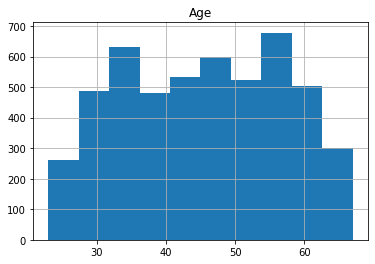

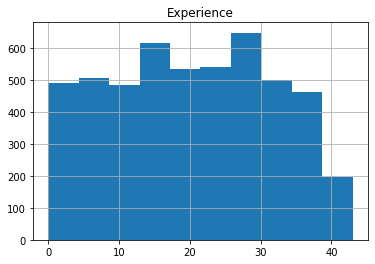

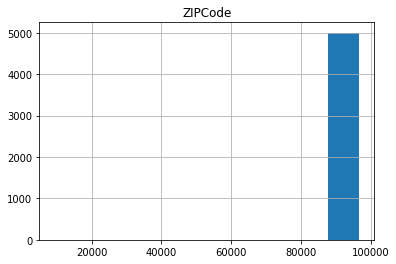

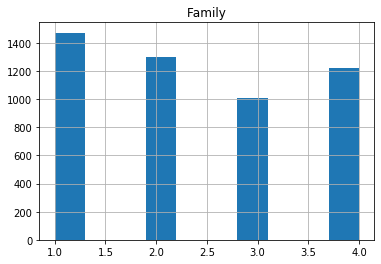

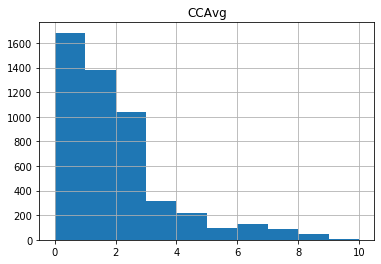

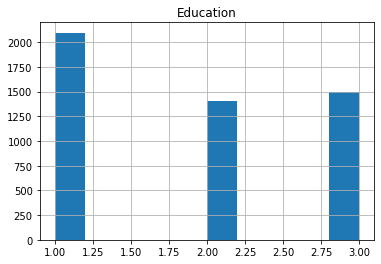

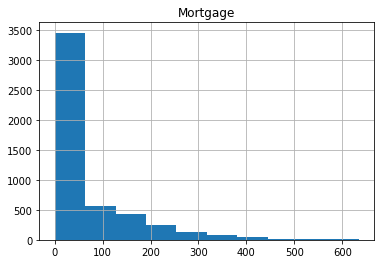

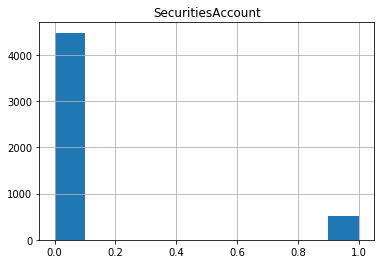

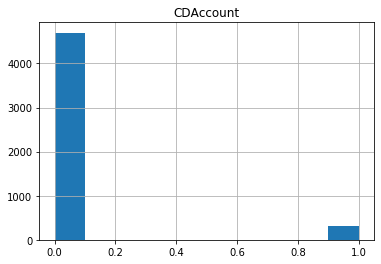

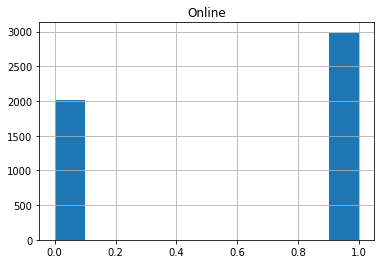

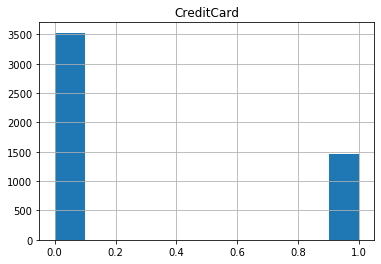

In [16]:
#Visualising each attribute for whole data set
data.hist(column='Age')
data.hist(column='Experience')
data.hist(column='ZIPCode')
data.hist(column='Family')
data.hist(column='CCAvg')
data.hist(column='Education')
data.hist(column='Mortgage')
data.hist(column='SecuritiesAccount')
data.hist(column='CDAccount')
data.hist(column='Online')
data.hist(column='CreditCard')


### Details of data distribution
1)Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

2)Experience is normally distributed with more customer having experience starting from 8 years.We can also see that mean and median are equal for this feature.In addition to it AGE and EXPERIENCE is highly corelated so we can drop the EXPERIENCE feature while we train the model

3)CCAvg is Here we can see that most of the expenditure is less than 2.5K

4)Mortgage Here we can see that the largest value is 635K

5)The variables family and education are ordinal variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A321CFA08>]],
      dtype=object)

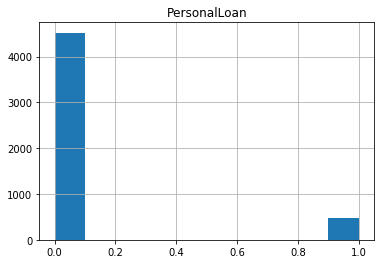

In [17]:
#Target column distribution
data.hist(column='PersonalLoan')

In [18]:
#Distribution of target variable "Personal Loan"
n_loan = len(data.loc[data['PersonalLoan'] == 1])
n_noloan = len(data.loc[data['PersonalLoan'] == 0])
print("Number of LOAN cases: {0} ({1:2.2f}%)".format(n_loan, (n_loan / (n_loan + n_noloan)) * 100 ))
print("Number of No LOAN cases: {0} ({1:2.2f}%)".format(n_noloan, (n_noloan / (n_loan + n_noloan)) * 100))


Number of LOAN cases: 480 (9.60%)
Number of No LOAN cases: 4520 (90.40%)


#### From the dataset we already know that among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

As it is a very biased dataset we will try to normalize the dataset to build a better model so that no feature is considered 
as outlier

In [19]:
#To prevent attributes to be considered as outliers for personal loan we will sample the data because the target variable
#is very imbalanced
#Separating loan and non loan custumers
data_noloan=data[data.PersonalLoan==0]
data_loan=data[data.PersonalLoan==1]

In [20]:
#creating a dataset with uniform distribution of target variable
loan_sample=data_loan.sample(n=480,random_state=7)
noloan_sample=data_noloan.sample(n=720,random_state=7)
total_sampled_data = pd.concat([loan_sample, noloan_sample], axis=0)

In [21]:
#Distribution of target variable "Personal Loan" in our new sampled dataset
s_loan = len(total_sampled_data.loc[total_sampled_data['PersonalLoan'] == 1])
s_noloan = len(total_sampled_data.loc[total_sampled_data['PersonalLoan'] == 0])
print("Number of LOAN cases: {0} ({1:2.2f}%)".format(s_loan, (s_loan / (s_loan + s_noloan)) * 100 ))
print("Number of No LOAN cases: {0} ({1:2.2f}%)".format(s_noloan, (s_noloan / (s_loan + s_noloan)) * 100))

Number of LOAN cases: 480 (40.00%)
Number of No LOAN cases: 720 (60.00%)


In [22]:
#Separating attributes and target variable component
X = total_sampled_data[[ 'Age', 'ZIPCode', 'Family','CCAvg','Education','Mortgage','SecuritiesAccount','CDAccount','Online','CreditCard']]
Y = total_sampled_data['PersonalLoan']

In [23]:
#Splitting the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
# 7 is just any random seed number

## Logistic Regression

In [24]:
#Fitting Logistic Regressor
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
#Predict the test set with  logistic model
y_predict=logmodel.predict(x_test)
X_train_preds = logmodel.predict_proba(x_train)[:,1]#predic_proba gives the probability of the target variable
X_test_preds = logmodel.predict_proba(x_test)[:,1]

In [26]:
#Evaluation of model by ROC, AUC ,FPR and TPR 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print('Train set')
print('Log model roc-auc: {}'.format(roc_auc_score(y_train, X_train_preds)))

print('Test set')
print('Log Model roc-auc: {}'.format(roc_auc_score(y_test, X_test_preds)))
fpr,tpr,thresholds=roc_curve(y_test,logmodel.predict_proba(x_test)[:,1])

Train set
Log model roc-auc: 0.8443246670894102
Test set
Log Model roc-auc: 0.8896722809766288


In [27]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
print(cm)
print("accuracy score of first model ",logmodel.score(x_test,y_test))

[[194  28]
 [ 35 103]]
accuracy score of first model  0.825


In [28]:
#Logistic Regression with grid search
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(logmodel,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.763095238095238


In [29]:
#logistic regression with best parameters
logreg2=LogisticRegression(C=10,penalty="l2")
logreg2.fit(x_train,y_train)
print("tuned model score",logreg2.score(x_test,y_test))

tuned model score 0.8222222222222222


In [30]:
#Confusion matrix of tuned logistic model
grid_predictions = logreg_cv.predict(x_test)
cm_tuned = confusion_matrix(y_test,grid_predictions)

print(cm_tuned)

[[195  27]
 [ 37 101]]


In [31]:
# print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       222
           1       0.79      0.73      0.76       138

    accuracy                           0.82       360
   macro avg       0.81      0.81      0.81       360
weighted avg       0.82      0.82      0.82       360



# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
#predicting by KNN
y_pred_KNN = KNN_model.predict(x_test)

In [34]:
#Confusion matrix of knn model
cm_knn = confusion_matrix(y_test,y_pred_KNN)
print(cm_knn)
print("accuracy score of first knn model ",KNN_model.score(x_test,y_test))

[[167  55]
 [ 84  54]]
accuracy score of first knn model  0.6138888888888889


In [35]:
#KNN with grid search
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
knn_param_grid = dict(n_neighbors = k_range, weights = weight_options)
clf = GridSearchCV(KNN_model,knn_param_grid, cv = 10, scoring = 'accuracy')
clf.fit(x_train, y_train)


print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy of knn tuned model :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 6, 'weights': 'uniform'}
accuracy of knn tuned model : 0.611904761904762


In [36]:
#building tuned knn model
KNN_model_tuned = KNeighborsClassifier(n_neighbors= 2, weights= 'uniform')
KNN_model_tuned.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [37]:
#predicting by tuned KNN
y_pred_KNN_tuned = KNN_model_tuned.predict(x_test)

In [38]:
#Confusion matrix of tuned knn model
cm_knn_tuned = confusion_matrix(y_test,y_pred_KNN_tuned)

print(cm_knn_tuned)

[[186  36]
 [103  35]]


In [39]:
# print classification report for tuned knn model 
print(classification_report(y_test, y_pred_KNN_tuned))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73       222
           1       0.49      0.25      0.33       138

    accuracy                           0.61       360
   macro avg       0.57      0.55      0.53       360
weighted avg       0.59      0.61      0.58       360



# Naive bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
#predict results
y_pred_naive = naive_model.predict(x_test)

In [42]:
#confusion matrix for naive model

cm_naive = confusion_matrix(y_test, y_pred_naive)
print(cm_naive)

[[206  16]
 [ 53  85]]


In [43]:
#Printing accuracy
from sklearn import metrics
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred_naive)))


Model Accuracy: 0.8083


In [44]:
# print classification report for Naive Bayes model 
print(classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       222
           1       0.84      0.62      0.71       138

    accuracy                           0.81       360
   macro avg       0.82      0.77      0.78       360
weighted avg       0.81      0.81      0.80       360



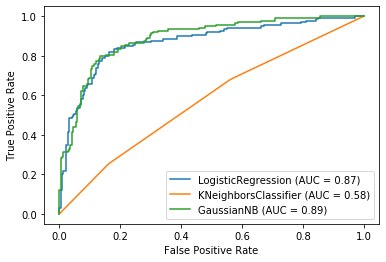

In [45]:
#ROC curve for all models
import nltk
import sklearn
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(logreg2,x_test,y_test)
knn_plot=plot_roc_curve(KNN_model_tuned,x_test,y_test,ax=disp.ax_)
naive_plot=plot_roc_curve(naive_model,x_test,y_test,ax=disp.ax_)

## Our aim is to build a model which can predict the potential customers for the bank
## We can infer from the above graph that Naive Bayes has the best accuracy among
## other classification model & hence we can choose it as our final model